In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import init

[*********************100%%**********************]  1 of 1 completed


총 수익률: -100.00%


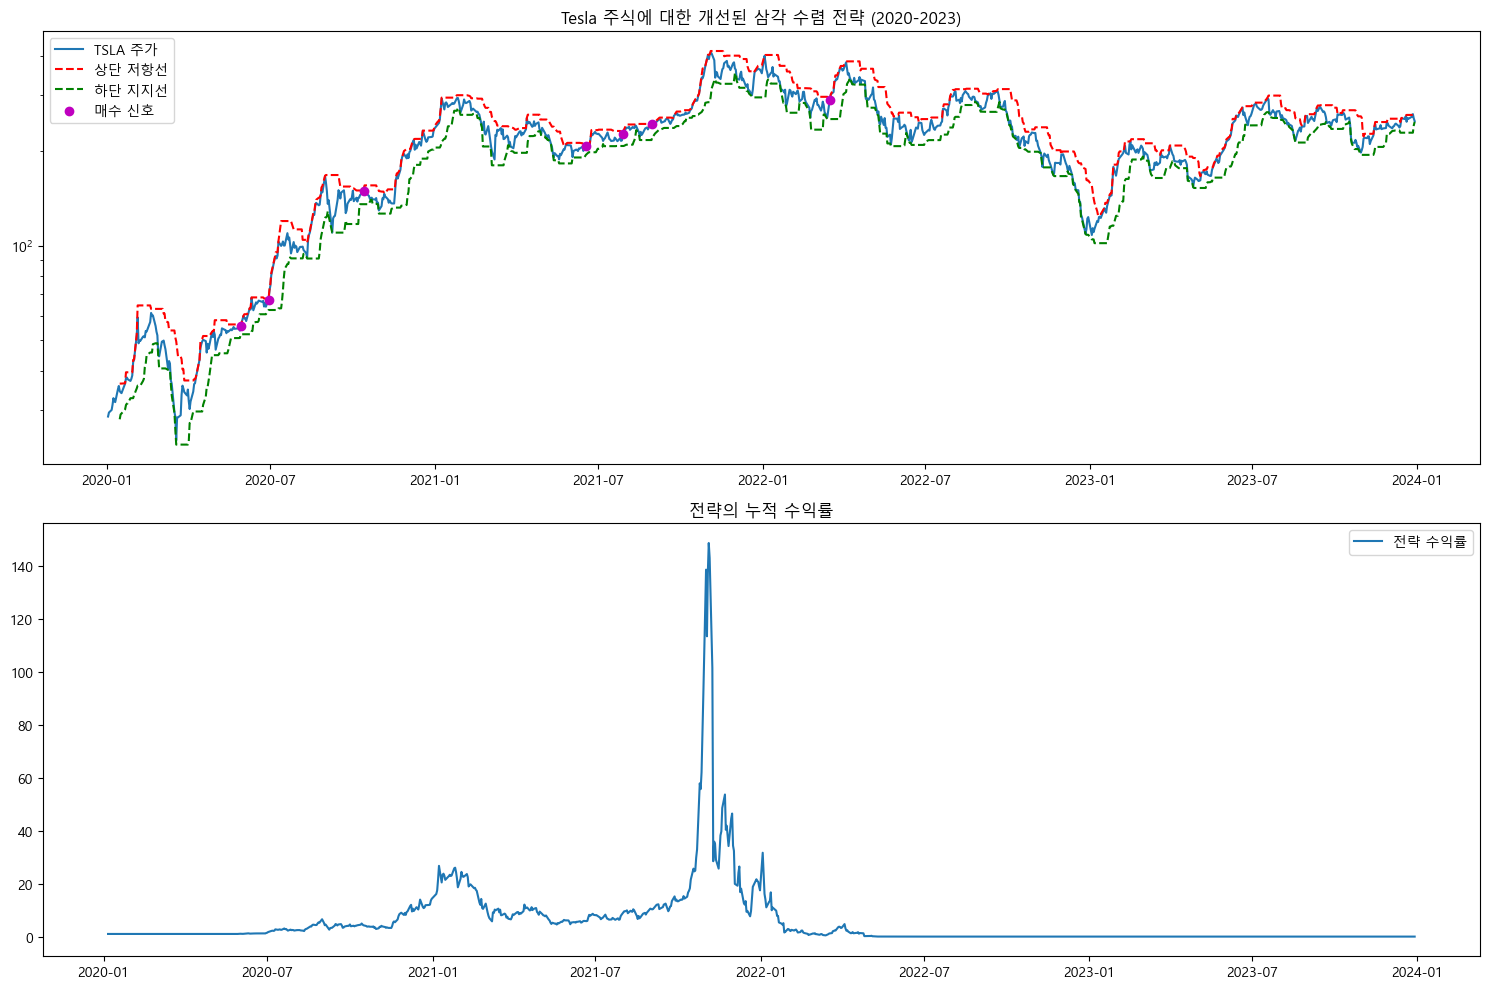


매수 시점:
                 Close    high_max     low_min
Date                                          
2020-05-29   55.666668   55.666668   52.333332
2020-06-29   67.290001   67.946671   62.476665
2020-10-13  148.883331  149.630005  135.350006
2021-06-18  207.770004  209.449997  194.293335
2021-07-29  225.783340  227.896667  207.096664
2021-08-30  243.636673  243.666672  216.279999
2022-03-17  290.533325  291.666656  252.013336

매수 후 보유 전략 수익률: 766.27%
삼각 수렴 전략 수익률: -100.00%
샤프 비율: 0.54


In [19]:
def identify_triangle_breakout(data, window=10):  # 윈도우 크기를 10으로 줄임
    data['high_max'] = data['High'].rolling(window=window).max()
    data['low_min'] = data['Low'].rolling(window=window).min()
    
    data['upper_trend'] = data['high_max'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    data['lower_trend'] = data['low_min'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    
    # 삼각 수렴 조건을 더 유연하게 변경
    data['triangle_convergence'] = (data['upper_trend'] <= 0.001) & (data['lower_trend'] >= -0.001)
    
    # 돌파 조건을 약간 완화
    data['breakout'] = (data['Close'] > data['high_max'] * 0.99) & data['triangle_convergence']
    
    return data

def trading_strategy(data):
    data = identify_triangle_breakout(data)
    
    data['position'] = 0
    data.loc[data['breakout'], 'position'] = 1
    
    # 연속된 매수 신호 제거
    data['position'] = data['position'].diff()
    data.loc[data['position'] <= 0, 'position'] = 0
    data['position'] = data['position'].cumsum()
    
    data['returns'] = data['Close'].pct_change()
    data['strategy_returns'] = data['position'].shift(1) * data['returns']
    
    return data

# Tesla 주식 데이터 다운로드 (2020년 1월 1일부터 2023년 12월 31일까지)
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')

# 전략 적용
result = trading_strategy(tesla_data)

# 결과 분석
cumulative_returns = (1 + result['strategy_returns']).cumprod()
total_return = cumulative_returns.iloc[-1] - 1

print(f"총 수익률: {total_return:.2%}")

# 그래프 그리기
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(result.index, result['Close'], label='TSLA 주가')
plt.plot(result.index, result['high_max'], label='상단 저항선', linestyle='--', color='r')
plt.plot(result.index, result['low_min'], label='하단 지지선', linestyle='--', color='g')
plt.scatter(result[result['breakout']].index, result[result['breakout']]['Close'], color='m', label='매수 신호', zorder=5)
plt.title('Tesla 주식에 대한 개선된 삼각 수렴 전략 (2020-2023)')
plt.legend()
plt.yscale('log')  # 로그 스케일 사용

plt.subplot(2,1,2)
plt.plot(cumulative_returns.index, cumulative_returns, label='전략 수익률')
plt.title('전략의 누적 수익률')
plt.legend()

plt.tight_layout()
plt.show()

# 매수 시점 상세 정보
buy_signals = result[result['breakout']]
print("\n매수 시점:")
print(buy_signals[['Close', 'high_max', 'low_min']])

# 전략 성과 평가
buy_and_hold_return = (result['Close'].iloc[-1] / result['Close'].iloc[0]) - 1
print(f"\n매수 후 보유 전략 수익률: {buy_and_hold_return:.2%}")
print(f"삼각 수렴 전략 수익률: {total_return:.2%}")

sharpe_ratio = np.sqrt(252) * result['strategy_returns'].mean() / result['strategy_returns'].std()
print(f"샤프 비율: {sharpe_ratio:.2f}")

[*********************100%%**********************]  1 of 1 completed


총 수익률: -100.00%


TypeError: bad operand type for unary ~: 'float'

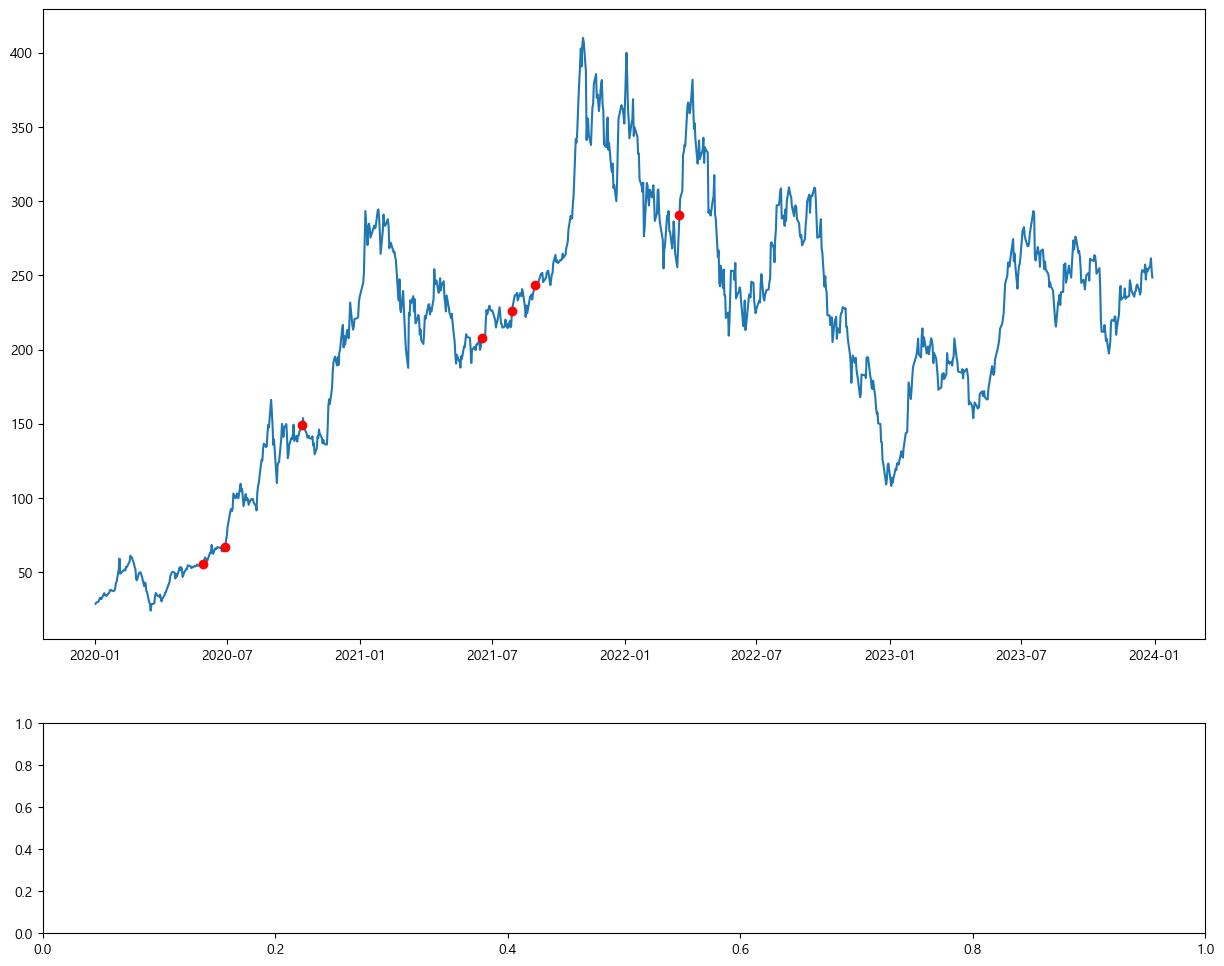

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def identify_triangle_breakout(data, window=10):
    data['high_max'] = data['High'].rolling(window=window).max()
    data['low_min'] = data['Low'].rolling(window=window).min()
    
    data['upper_trend'] = data['high_max'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    data['lower_trend'] = data['low_min'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    
    data['triangle_convergence'] = (data['upper_trend'] <= 0.001) & (data['lower_trend'] >= -0.001)
    data['breakout'] = (data['Close'] > data['high_max'] * 0.99) & data['triangle_convergence']
    
    return data

def trading_strategy(data):
    data = identify_triangle_breakout(data)
    
    data['position'] = 0
    data.loc[data['breakout'], 'position'] = 1
    
    data['position'] = data['position'].diff()
    data.loc[data['position'] <= 0, 'position'] = 0
    data['position'] = data['position'].cumsum()
    
    data['returns'] = data['Close'].pct_change()
    data['strategy_returns'] = data['position'].shift(1) * data['returns']
    
    return data

def plot_triangle(ax, start, end, high, low):
    triangle = Polygon([(start, low), (end, (high+low)/2), (start, high)], 
                       facecolor='yellow', edgecolor='orange', alpha=0.3)
    ax.add_patch(triangle)

# Tesla 주식 데이터 다운로드 (2020년 1월 1일부터 2023년 12월 31일까지)
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')

# 전략 적용
result = trading_strategy(tesla_data)

# 결과 분석
cumulative_returns = (1 + result['strategy_returns']).cumprod()
total_return = cumulative_returns.iloc[-1] - 1

print(f"총 수익률: {total_return:.2%}")

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(result.index, result['Close'], label='TSLA 주가')
ax1.scatter(result[result['breakout']].index, result[result['breakout']]['Close'], color='r', label='매수 신호', zorder=5)

# 삼각형 패턴 그리기
triangle_starts = result[result['triangle_convergence'] & ~result['triangle_convergence'].shift(1)].index
triangle_ends = result[~result['triangle_convergence'] & result['triangle_convergence'].shift(1)].index

for start, end in zip(triangle_starts, triangle_ends):
    if start < end:  # 유효한 구간인 경우에만 그리기
        high = result.loc[start:end, 'High'].max()
        low = result.loc[start:end, 'Low'].min()
        plot_triangle(ax1, start, end, high, low)

ax1.set_title('Tesla 주식에 대한 개선된 삼각 수렴 전략 (2020-2023)')
ax1.legend()
ax1.set_yscale('log')

ax2.plot(cumulative_returns.index, cumulative_returns, label='전략 수익률')
ax2.set_title('전략의 누적 수익률')
ax2.legend()

plt.tight_layout()
plt.show()

# 매수 시점 상세 정보
buy_signals = result[result['breakout']]
print("\n매수 시점:")
print(buy_signals[['Close', 'high_max', 'low_min']])

# 전략 성과 평가
buy_and_hold_return = (result['Close'].iloc[-1] / result['Close'].iloc[0]) - 1
print(f"\n매수 후 보유 전략 수익률: {buy_and_hold_return:.2%}")
print(f"삼각 수렴 전략 수익률: {total_return:.2%}")

sharpe_ratio = np.sqrt(252) * result['strategy_returns'].mean() / result['strategy_returns'].std()
print(f"샤프 비율: {sharpe_ratio:.2f}")

[*********************100%%**********************]  1 of 1 completed

총 수익률: 0.00%


TypeError: float() argument must be a string or a real number, not 'Timestamp'

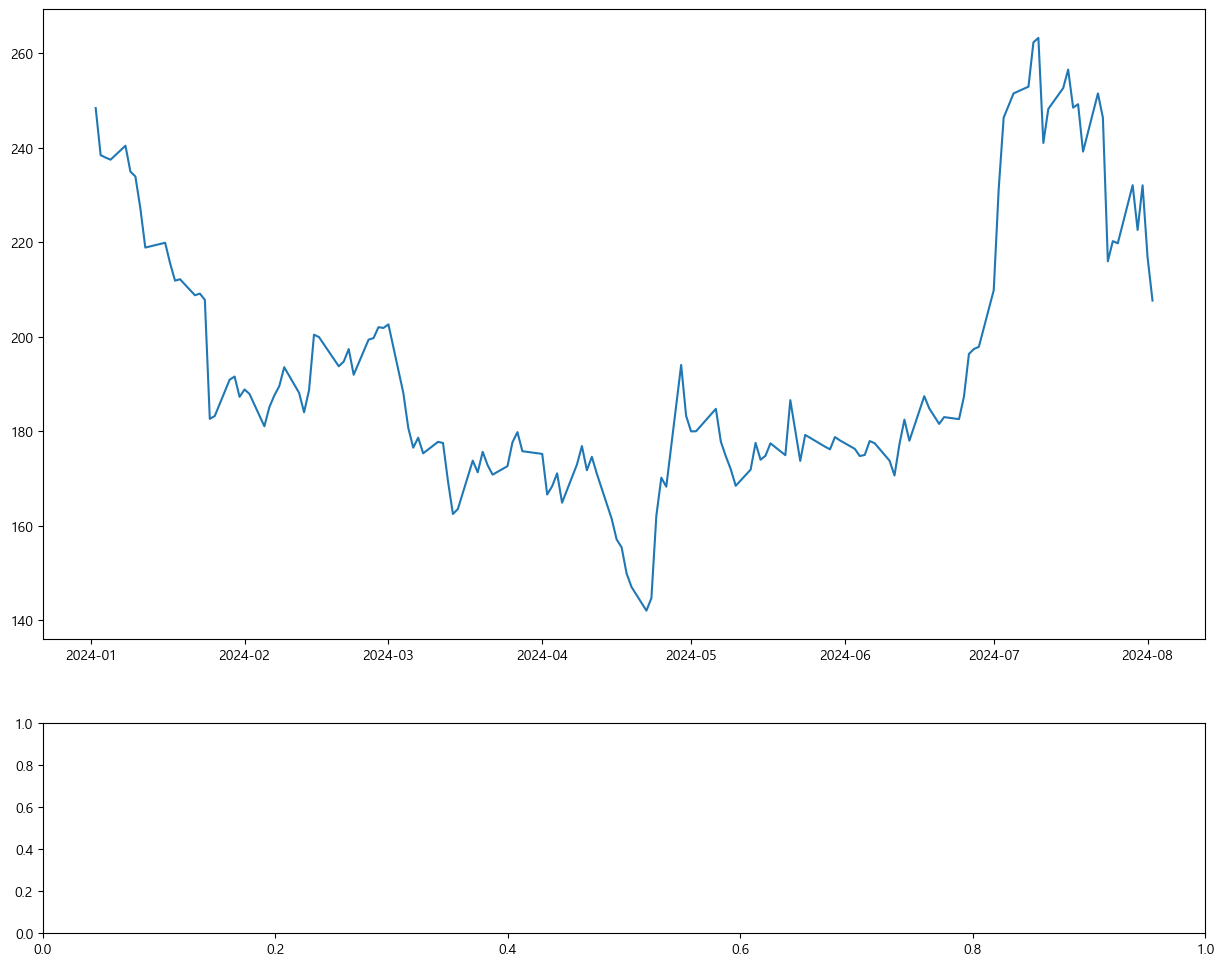

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def identify_triangle_breakout(data, window=20):
    data['high_max'] = data['High'].rolling(window=window).max()
    data['low_min'] = data['Low'].rolling(window=window).min()
    
    data['upper_trend'] = data['high_max'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    data['lower_trend'] = data['low_min'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    
    data['triangle_convergence'] = ((data['upper_trend'] <= 0.001) & (data['lower_trend'] >= -0.001)).astype(int)
    data['breakout'] = ((data['Close'] > data['high_max'] * 0.99) & (data['triangle_convergence'] == 1)).astype(int)
    
    return data

def trading_strategy(data):
    data = identify_triangle_breakout(data)
    
    data['position'] = data['breakout'].diff()
    data.loc[data['position'] <= 0, 'position'] = 0
    data['position'] = data['position'].cumsum()
    
    data['returns'] = data['Close'].pct_change()
    data['strategy_returns'] = data['position'].shift(1) * data['returns']
    
    return data

def plot_triangle(ax, start, end, high, low):
    triangle = Polygon([(start, low), (end, (high+low)/2), (start, high)], 
                       facecolor='yellow', edgecolor='orange', alpha=0.3)
    ax.add_patch(triangle)

# Tesla 주식 데이터 다운로드 (2020년 1월 1일부터 2023년 12월 31일까지)
tesla_data = yf.download('TSLA', start='2024-01-01', end='2024-12-31')

# 전략 적용
result = trading_strategy(tesla_data)

# 결과 분석
cumulative_returns = (1 + result['strategy_returns']).cumprod()
total_return = cumulative_returns.iloc[-1] - 1

print(f"총 수익률: {total_return:.2%}")

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(result.index, result['Close'], label='TSLA 주가')
ax1.scatter(result[result['breakout'] == 1].index, result[result['breakout'] == 1]['Close'], color='r', label='매수 신호', zorder=5)

# 삼각형 패턴 그리기
triangle_starts = result[result['triangle_convergence'].diff() == 1].index
triangle_ends = result[result['triangle_convergence'].diff() == -1].index

for start, end in zip(triangle_starts, triangle_ends):
    if start < end:  # 유효한 구간인 경우에만 그리기
        high = result.loc[start:end, 'High'].max()
        low = result.loc[start:end, 'Low'].min()
        plot_triangle(ax1, start, end, high, low)

ax1.set_title('Tesla 주식에 대한 개선된 삼각 수렴 전략 (2020-2023)')
ax1.legend()
ax1.set_yscale('log')

ax2.plot(cumulative_returns.index, cumulative_returns, label='전략 수익률')
ax2.set_title('전략의 누적 수익률')
ax2.legend()

plt.tight_layout()
plt.show()

# 매수 시점 상세 정보
buy_signals = result[result['breakout'] == 1]
print("\n매수 시점:")
print(buy_signals[['Close', 'high_max', 'low_min']])

# 전략 성과 평가
buy_and_hold_return = (result['Close'].iloc[-1] / result['Close'].iloc[0]) - 1
print(f"\n매수 후 보유 전략 수익률: {buy_and_hold_return:.2%}")
print(f"삼각 수렴 전략 수익률: {total_return:.2%}")

sharpe_ratio = np.sqrt(252) * result['strategy_returns'].mean() / result['strategy_returns'].std()
print(f"샤프 비율: {sharpe_ratio:.2f}")

[*********************100%%**********************]  1 of 1 completed


총 수익률: -52.46%


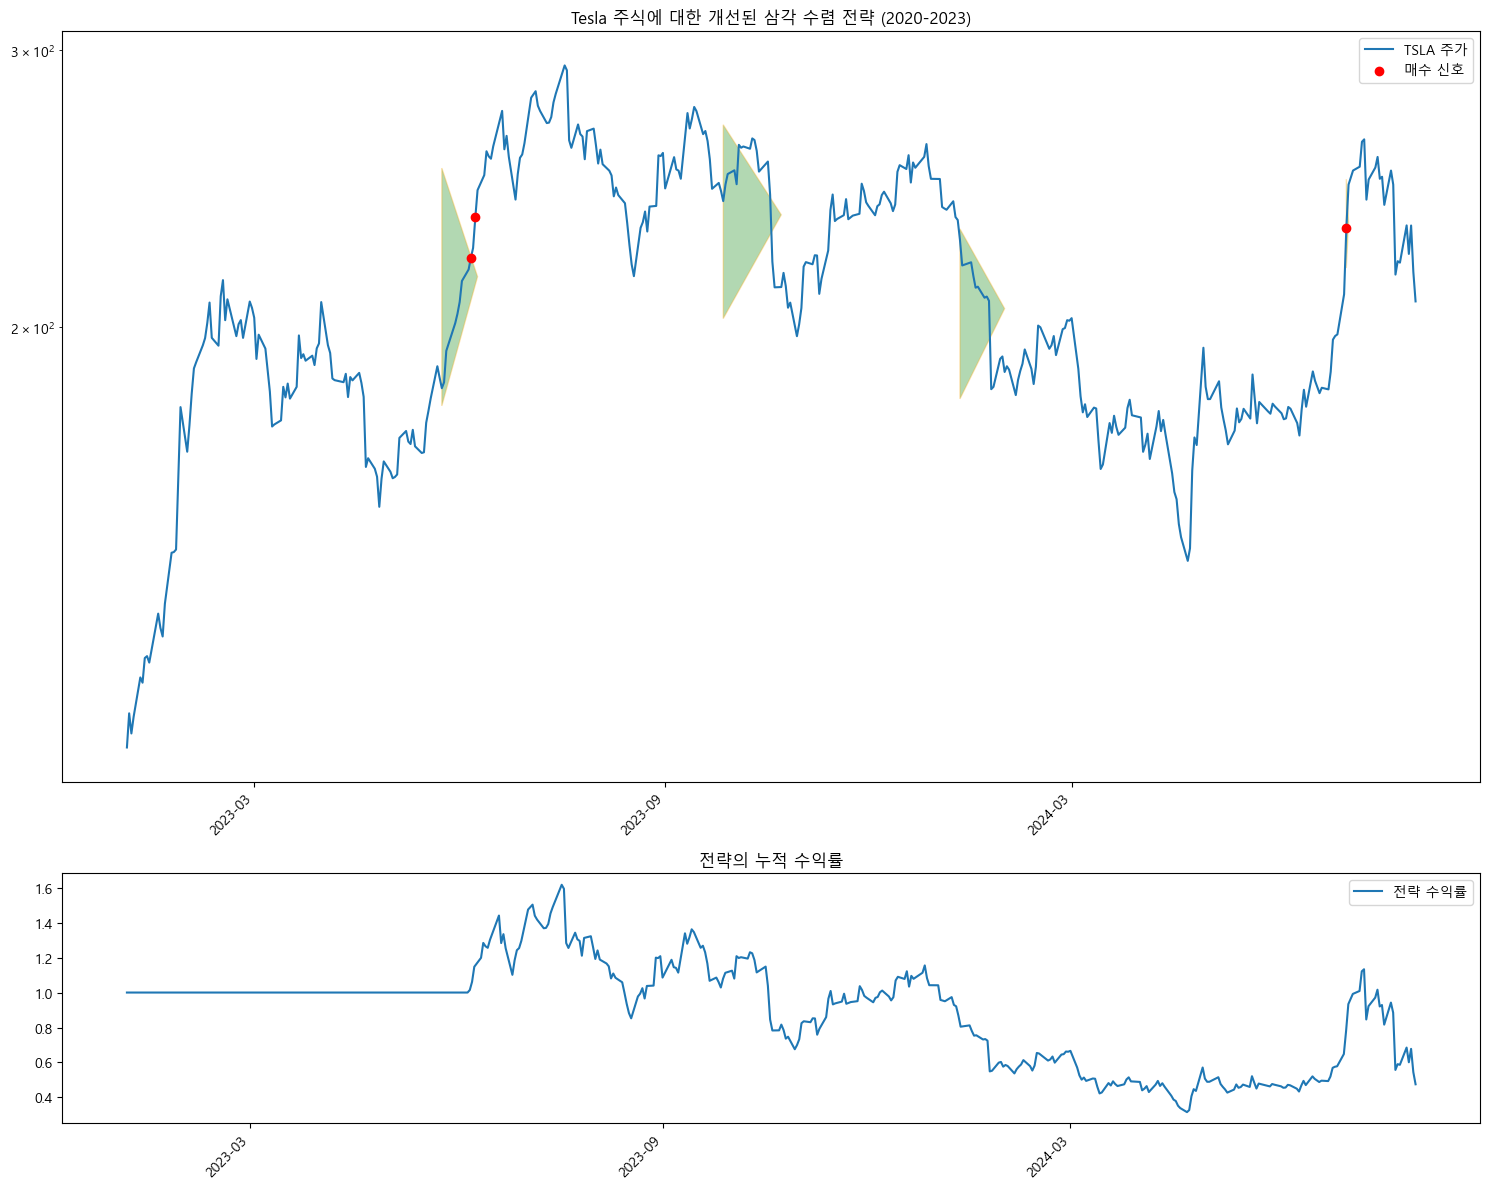


매수 시점:
                 Close    high_max     low_min
Date                                          
2023-06-06  221.309998  221.910004  152.369995
2023-06-08  234.860001  235.229996  152.369995
2024-07-02  231.259995  231.300003  138.800003

매수 후 보유 전략 수익률: 92.11%
삼각 수렴 전략 수익률: -52.46%
샤프 비율: 0.04


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.dates as mdates

def identify_triangle_breakout(data, window=50):
    data['high_max'] = data['High'].rolling(window=window).max()
    data['low_min'] = data['Low'].rolling(window=window).min()
    
    data['upper_trend'] = data['high_max'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    data['lower_trend'] = data['low_min'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    
    data['triangle_convergence'] = ((data['upper_trend'] <= 0.001) & (data['lower_trend'] >= -0.001)).astype(int)
    data['breakout'] = ((data['Close'] > data['high_max'] * 0.99) & (data['triangle_convergence'] == 1)).astype(int)
    
    return data

def trading_strategy(data):
    data = identify_triangle_breakout(data)
    
    data['position'] = data['breakout'].diff()
    data.loc[data['position'] <= 0, 'position'] = 0
    data['position'] = data['position'].cumsum()
    
    data['returns'] = data['Close'].pct_change()
    data['strategy_returns'] = data['position'].shift(1) * data['returns']
    
    return data

def plot_triangle(ax, start, end, high, low):
    triangle = Polygon([(mdates.date2num(start), low), (mdates.date2num(end), (high+low)/2), (mdates.date2num(start), high)], 
                       facecolor='green', edgecolor='orange', alpha=0.3)
    ax.add_patch(triangle)

# Tesla 주식 데이터 다운로드 (2020년 1월 1일부터 2023년 12월 31일까지)
tesla_data = yf.download('TSLA', start='2023-01-01', end='2024-8-22')

# 전략 적용
result = trading_strategy(tesla_data)

# 결과 분석
cumulative_returns = (1 + result['strategy_returns']).cumprod()
total_return = cumulative_returns.iloc[-1] - 1

print(f"총 수익률: {total_return:.2%}")

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(result.index, result['Close'], label='TSLA 주가')
ax1.scatter(result[result['breakout'] == 1].index, result[result['breakout'] == 1]['Close'], color='r', label='매수 신호', zorder=5)

# 삼각형 패턴 그리기
triangle_starts = result[result['triangle_convergence'].diff() == 1].index
triangle_ends = result[result['triangle_convergence'].diff() == -1].index

for start, end in zip(triangle_starts, triangle_ends):
    if start < end:  # 유효한 구간인 경우에만 그리기
        high = result.loc[start:end, 'High'].max()
        low = result.loc[start:end, 'Low'].min()
        plot_triangle(ax1, start, end, high, low)

ax1.set_title('Tesla 주식에 대한 개선된 삼각 수렴 전략 (2020-2023)')
ax1.legend()
ax1.set_yscale('log')

# x축 날짜 포맷 설정
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2.plot(cumulative_returns.index, cumulative_returns, label='전략 수익률')
ax2.set_title('전략의 누적 수익률')
ax2.legend()

# x축 날짜 포맷 설정
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 매수 시점 상세 정보
buy_signals = result[result['breakout'] == 1]
print("\n매수 시점:")
print(buy_signals[['Close', 'high_max', 'low_min']])

# 전략 성과 평가
buy_and_hold_return = (result['Close'].iloc[-1] / result['Close'].iloc[0]) - 1
print(f"\n매수 후 보유 전략 수익률: {buy_and_hold_return:.2%}")
print(f"삼각 수렴 전략 수익률: {total_return:.2%}")

sharpe_ratio = np.sqrt(252) * result['strategy_returns'].mean() / result['strategy_returns'].std()
print(f"샤프 비율: {sharpe_ratio:.2f}")

[*********************100%%**********************]  1 of 1 completed


총 수익률: -10.20%


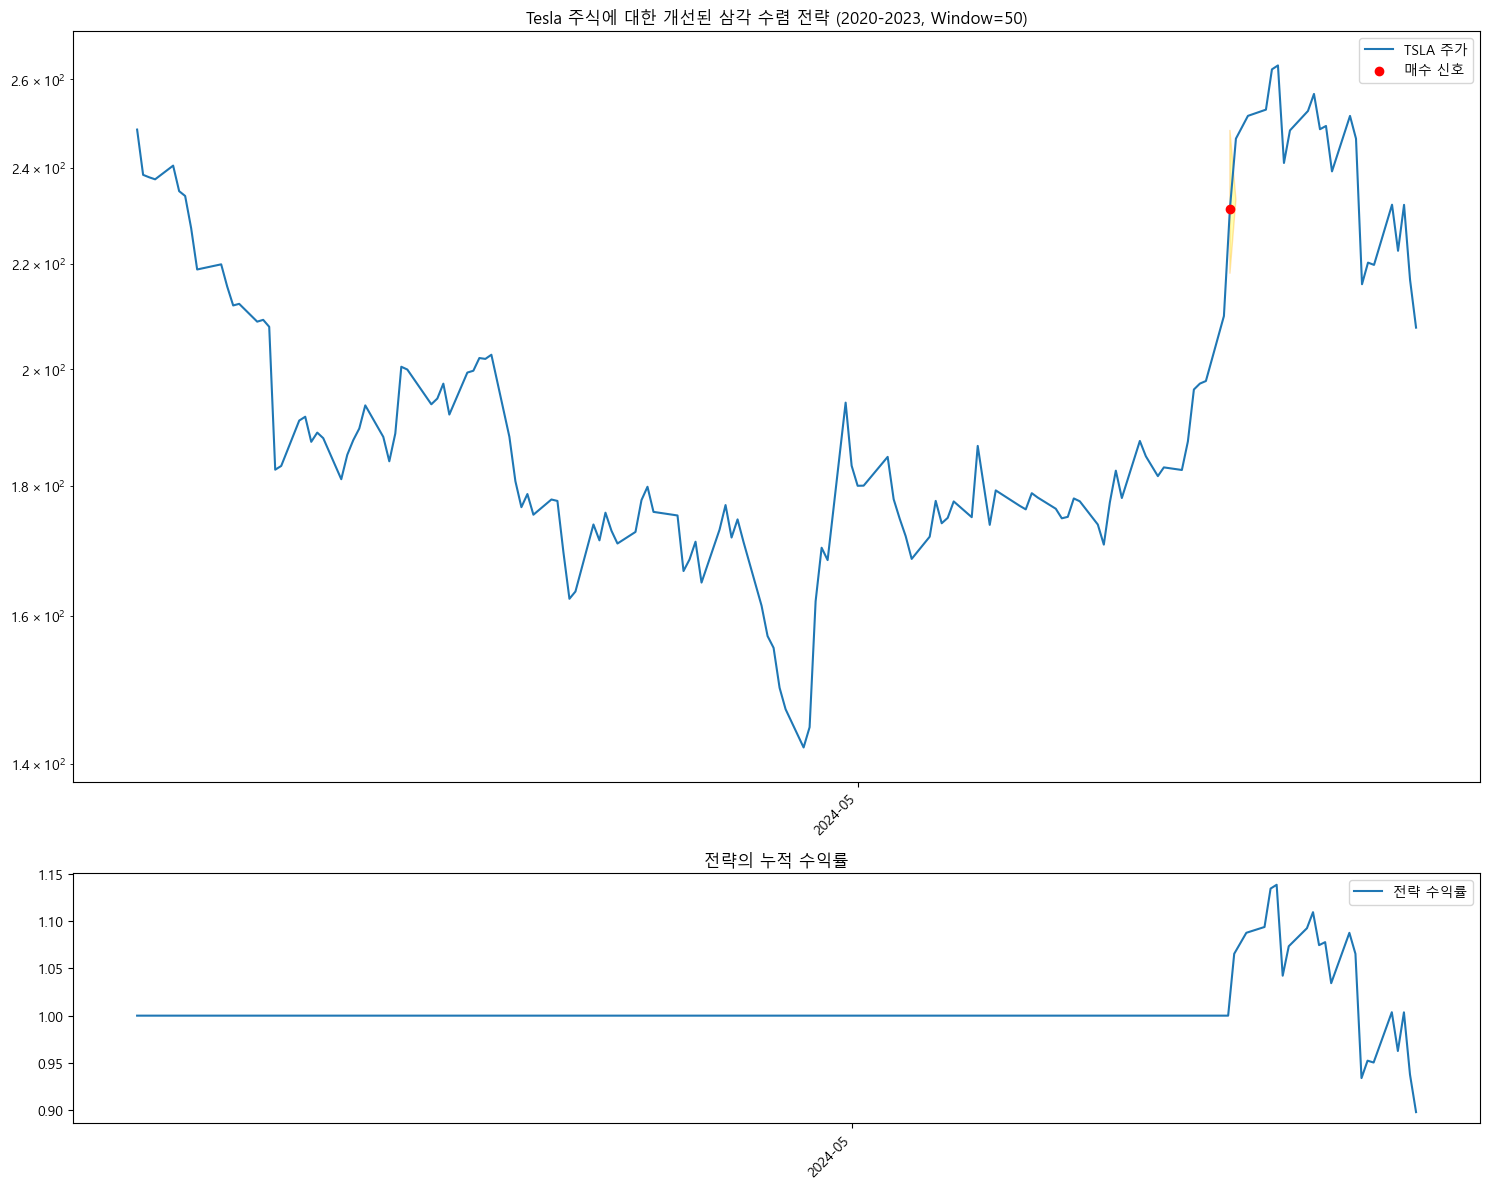


매수 시점:
                 Close    high_max     low_min
Date                                          
2024-07-02  231.259995  231.300003  138.800003

매수 후 보유 전략 수익률: -16.40%
삼각 수렴 전략 수익률: -10.20%
샤프 비율: -0.49


In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.dates as mdates

def identify_triangle_breakout(data, window=50):  # window 크기를 50으로 변경
    data['high_max'] = data['High'].rolling(window=window).max()
    data['low_min'] = data['Low'].rolling(window=window).min()
    
    data['upper_trend'] = data['high_max'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    data['lower_trend'] = data['low_min'].rolling(window=window).apply(lambda x: np.polyfit(range(window), x, 1)[0])
    
    data['triangle_convergence'] = ((data['upper_trend'] <= 0.001) & (data['lower_trend'] >= -0.001)).astype(int)
    data['breakout'] = ((data['Close'] > data['high_max'] * 0.99) & (data['triangle_convergence'] == 1)).astype(int)
    
    return data

def trading_strategy(data):
    data = identify_triangle_breakout(data)
    
    data['position'] = data['breakout'].diff()
    data.loc[data['position'] <= 0, 'position'] = 0
    data['position'] = data['position'].cumsum()
    
    data['returns'] = data['Close'].pct_change()
    data['strategy_returns'] = data['position'].shift(1) * data['returns']
    
    return data

def plot_triangle(ax, start, end, high, low):
    triangle = Polygon([(mdates.date2num(start), low), (mdates.date2num(end), (high+low)/2), (mdates.date2num(start), high)], 
                       facecolor='yellow', edgecolor='orange', alpha=0.3)
    ax.add_patch(triangle)

# Tesla 주식 데이터 다운로드 (2020년 1월 1일부터 2023년 12월 31일까지)
tesla_data = yf.download('TSLA', start='2024-01-01', end='2024-12-31')

# 전략 적용
result = trading_strategy(tesla_data)

# 결과 분석
cumulative_returns = (1 + result['strategy_returns']).cumprod()
total_return = cumulative_returns.iloc[-1] - 1

print(f"총 수익률: {total_return:.2%}")

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(result.index, result['Close'], label='TSLA 주가')
ax1.scatter(result[result['breakout'] == 1].index, result[result['breakout'] == 1]['Close'], color='r', label='매수 신호', zorder=5)

# 삼각형 패턴 그리기
triangle_starts = result[result['triangle_convergence'].diff() == 1].index
triangle_ends = result[result['triangle_convergence'].diff() == -1].index

for start, end in zip(triangle_starts, triangle_ends):
    if start < end:  # 유효한 구간인 경우에만 그리기
        high = result.loc[start:end, 'High'].max()
        low = result.loc[start:end, 'Low'].min()
        plot_triangle(ax1, start, end, high, low)

ax1.set_title('Tesla 주식에 대한 개선된 삼각 수렴 전략 (2020-2023, Window=50)')
ax1.legend()
ax1.set_yscale('log')

# x축 날짜 포맷 설정
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2.plot(cumulative_returns.index, cumulative_returns, label='전략 수익률')
ax2.set_title('전략의 누적 수익률')
ax2.legend()

# x축 날짜 포맷 설정
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 매수 시점 상세 정보
buy_signals = result[result['breakout'] == 1]
print("\n매수 시점:")
print(buy_signals[['Close', 'high_max', 'low_min']])

# 전략 성과 평가
buy_and_hold_return = (result['Close'].iloc[-1] / result['Close'].iloc[0]) - 1
print(f"\n매수 후 보유 전략 수익률: {buy_and_hold_return:.2%}")
print(f"삼각 수렴 전략 수익률: {total_return:.2%}")

sharpe_ratio = np.sqrt(252) * result['strategy_returns'].mean() / result['strategy_returns'].std()
print(f"샤프 비율: {sharpe_ratio:.2f}")